In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import string
import json
pd.options.mode.chained_assignment = None  # default='warn'
from merge_vegas import open_pickle, save_to_pickle
from import_yelp_mongo import get_yelp_reviews, get_yelp_reviews_afterdate

%matplotlib inline

/Users/tracy/anaconda/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:33: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
from IPython.display import display

# Read in datasets

In [323]:
WI = open_pickle('../data/mad/madison_yelp_merge.pkl')
NV = open_pickle('../data/vegas/vegas_yelp_merge.pkl')
AZ = open_pickle('../data/phx/phoenix_yelp_merge.pkl')
NC = open_pickle('../data/char/charlotte_yelp_merge.pkl')

In [324]:
print WI.shape
print NV.shape
print AZ.shape
print NC.shape

(654, 54)
(952, 40)
(3984, 43)
(1332, 56)


# Subset Review database

In [14]:
def state_yelp_reviews(df, d, tag):
    ids_ = df.business_id.values.tolist()
    R = get_yelp_reviews_afterdate(ids_, d)
    print R.info()
    
    save_to_pickle(R, '../data/yelp/yelp_reviews_%s.pkl' % tag)
    
    return R

In [15]:
R_WI = state_yelp_reviews(WI, '2011-06-30', 'madison')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 18983
Data columns (total 9 columns):
_id            18984 non-null object
business_id    18984 non-null object
date           18984 non-null object
review_id      18984 non-null object
stars          18984 non-null int64
text           18984 non-null object
type           18984 non-null object
user_id        18984 non-null object
votes          18984 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None


## Madison, WI

In [401]:
import features_madison as lib

In [402]:
reload(lib)

<module 'features_madison' from 'features_madison.py'>

In [6]:
WI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, (43 north, 108, king st, madison, 53703) to (windsor, 53598)
Data columns (total 54 columns):
address                    654 non-null object
addressy_                  654 non-null object
attributes                 654 non-null object
avg                        356 non-null float64
avg_2                      356 non-null float64
avg_3                      356 non-null float64
avg_w                      356 non-null float64
avg_w_2                    356 non-null float64
avg_w_3                    356 non-null float64
business_id                654 non-null object
categories                 654 non-null object
city                       654 non-null object
complex                    654 non-null object
complexy_                  654 non-null object
full_address               654 non-null object
fuzz_partial_ratio         356 non-null float64
fuzz_partial_ratio_2       356 non-null float64
fuzz_partial_ratio_3       356 non-null f

In [17]:
print R_WI.date.min()
print R_WI.date.max()

2011-07-01
2015-01-08


In [385]:
print pd.to_datetime(I_WI.date).min()
print pd.to_datetime(I_WI.date).max()

2012-01-04 00:00:00
2015-10-30 00:00:00


In [404]:
%%time
df_WI = lib.get_features_WI(WI, '2011-06-30', 'madison', ['n_critical', 'n_violations'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 18983
Data columns (total 9 columns):
_id            18984 non-null object
business_id    18984 non-null object
date           18984 non-null object
review_id      18984 non-null object
stars          18984 non-null int64
text           18984 non-null object
type           18984 non-null object
user_id        18984 non-null object
votes          18984 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None
(94353, 15)
(16775, 15)
CPU times: user 48.2 s, sys: 2.28 s, total: 50.5 s
Wall time: 1min 13s


In [269]:
save_to_pickle(df_WI, '../data/mad/madison_yelp_features.pkl')

# Charlotte, NC

In [354]:
import features_charlotte as lib

In [581]:
reload(lib)

<module 'features_phoenix' from 'features_phoenix.py'>

In [346]:
NC.columns.values

array(['address', 'addressy_', u'attributes', 'avg', 'avg_2', 'avg_3',
       'avg_w', 'avg_w_2', 'avg_w_3', u'business_id', u'categories',
       'city', u'cityy_', 'complex', 'county', u'full_address',
       'fuzz_partial_ratio', 'fuzz_partial_ratio_2',
       'fuzz_partial_ratio_3', 'fuzz_ratio', 'fuzz_ratio_2',
       'fuzz_ratio_3', 'fuzz_token_set_ratio', 'fuzz_token_set_ratio_2',
       'fuzz_token_set_ratio_3', 'fuzz_token_sort_ratio',
       'fuzz_token_sort_ratio_2', 'fuzz_token_sort_ratio_3', u'hours',
       'id_', 'inspections', u'latitude', u'longitude', 'max', 'max_2',
       'max_3', 'name', 'name2_h', 'name2_y', 'name_', 'name_y_',
       u'namey_', u'neighborhoods', 'num', 'numy_', u'open',
       u'review_count', u'stars', 'state', u'statey_', 'street',
       'streety_', 'suite', 'suitey_', 'type', u'typey_'], dtype=object)

In [382]:
I_NC = lib.get_NC_inspections(NC, drop_flag=False)

In [383]:
I_NC.head()

,date,score,grade,inspector,id_,inspec_id
0,3/3/2015,97,A,2219,161416,161416_0
1,12/5/2014,96,A,2219,161416,161416_1
2,9/24/2015,97,A,2427,127669,127669_0
3,5/26/2015,97.50,A,2447,127669,127669_1
4,1/15/2015,97,A,2447,127669,127669_2


In [386]:
print pd.to_datetime(I_NC.date).min()
print pd.to_datetime(I_NC.date).max()

2013-06-24 00:00:00
2015-10-21 00:00:00


In [387]:
R_NC = lib.state_yelp_reviews(NC, '2012-11-30', 'charlotte')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29898 entries, 0 to 29897
Data columns (total 9 columns):
_id            29898 non-null object
business_id    29898 non-null object
date           29898 non-null object
review_id      29898 non-null object
stars          29898 non-null int64
text           29898 non-null object
type           29898 non-null object
user_id        29898 non-null object
votes          29898 non-null object
dtypes: int64(1), object(8)
memory usage: 2.3+ MB
None


In [391]:
y, x = lib.merge_inspec_dates(I_NC, NC, R_NC, ['score','grade'])

(175773, 15)
(130504, 15)


In [399]:
%%time
df_NC = lib.get_features_NC(NC, '2011-06-30', 'charlotte', ['score','grade'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41485 entries, 0 to 41484
Data columns (total 9 columns):
_id            41485 non-null object
business_id    41485 non-null object
date           41485 non-null object
review_id      41485 non-null object
stars          41485 non-null int64
text           41485 non-null object
type           41485 non-null object
user_id        41485 non-null object
votes          41485 non-null object
dtypes: int64(1), object(8)
memory usage: 3.2+ MB
None
(241574, 15)
(196930, 15)
CPU times: user 57.9 s, sys: 2.71 s, total: 1min
Wall time: 1min 23s


In [406]:
save_to_pickle(df_NC, '../data/char/charlotte_yelp_features.pkl')

# Phoenix, AZ

In [512]:
import features_phoenix as lib

In [589]:
reload(lib)

<module 'features_phoenix' from 'features_phoenix.py'>

In [ ]:
target_list = ['n_priority', 'grade', 'n_violations','v_core','sum_core',
               'v_foundation','sum_foundation','v_priority','sum_priority']
df_AZ = lib.get_features_AZ(AZ, '2012-04-01', 'phoenix', target_list)

In [ ]:
save_to_pickle(df_AZ, '../data/phx/phoenix_yelp_features.pkl')

In [516]:
I_AZ = lib.get_AZ_inspections(AZ)

In [557]:
print pd.to_datetime(I_AZ.date).min()
print pd.to_datetime(I_AZ.date).max()

2012-10-23 00:00:00
2015-10-27 00:00:00


In [556]:
I_AZ.head()

,comments,cutting_edge,date,grade,inspec_id,link,n_priority,permit_id,purpose,has_v,id_
2000,This establishment is not participating in the...,,07/30/2015,Not Participating,3755626,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,0,FD-00235,Routine Inspection,True,FD-00235
2001,This establishment is not participating in the...,,04/29/2015,Not Participating,3716286,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,1,FD-00235,Routine Inspection,True,FD-00235
2002,This establishment is not participating in the...,,01/29/2015,Not Participating,3675671,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,1,FD-00235,Routine Inspection,True,FD-00235
2003,This establishment received an B Grade and had...,,10/13/2014,B,3633122,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,NA,FD-00235,Routine Inspection,True,FD-00235
2004,This establishment is not participating in the...,,07/23/2014,Not Participating,3598800,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,NA,FD-00235,Routine Inspection,True,FD-00235


In [590]:
V_AZ, I_AZ = lib.get_AZ_violations(I_AZ)

In [587]:
I_AZ['test'] = lib.v_count(I_AZ, V_AZ, 'n_core')

In [591]:
I_AZ.describe()

,has_v,n_violations,v_core,sum_core,v_foundation,sum_foundation,v_priority,sum_priority,test
count,44502,24926.000000,44502.00000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.00000
mean,0.56011,2.436652,0.55811,0.575839,0.349939,0.361062,0.473170,0.479192,0.55811
std,0.496379,1.657970,0.92443,0.972505,0.695587,0.727933,0.821465,0.840352,0.92443
min,False,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,True,16.000000,10.00000,12.000000,8.000000,8.000000,8.000000,10.000000,10.00000


In [ ]:
temp = pd.Series(0, index=[1,2,3,4,5])
print temp


In [596]:
I_AZ.pivot_table(values='inspec_id',columns='v_priority',index='n_priority', aggfunc='count')

v_priority,0,1,2,3,4,5,6,7,8
n_priority,,,,,,,,,
0,8718,99,22,10,1,NaN,NaN,NaN,NaN
1,2,2723,7,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,17,923,4,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,22,245,1,NaN,NaN,NaN,NaN
4,NaN,NaN,1,13,82,1,NaN,NaN,NaN
5,NaN,NaN,NaN,1,6,20,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
NA,21473,6704,2359,756,199,62,16,4,1


In [500]:
I_AZ.groupby('grade')[['n_priority']].describe().unstack(-1)

n_priority                  
                       count unique top   freq
grade                                         
                       31820      4  NA  21844
A                      63980      5  NA  42494
B                      16874      4  NA  12225
C                       1957      6  NA   1446
D                        529      8  NA    392
Not Participating      56655      9  NA  39485
Re-Inspection            128      4  NA     93
Training                   2      1  NA      2

In [501]:
I_AZ.n_priority.value_counts()

NA    117981
0      43148
1       7762
2       2181
3        623
4        179
5         51
6         18
7          2
Name: n_priority, dtype: int64

# Las Vegas, NV

In [481]:
import features_vegas as lib

In [486]:
reload(lib)

<module 'features_vegas' from 'features_vegas.py'>

In [487]:
%%time
df_NV = lib.get_features_NV(NV, '1989-07-01', 'vegas', ['result','type_id','demerits','grade', 'n_violations'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43606 entries, 0 to 43605
Data columns (total 9 columns):
_id            43606 non-null object
business_id    43606 non-null object
date           43606 non-null object
review_id      43606 non-null object
stars          43606 non-null int64
text           43606 non-null object
type           43606 non-null object
user_id        43606 non-null object
votes          43606 non-null object
dtypes: int64(1), object(8)
memory usage: 3.3+ MB
None
(735767, 18)
(218969, 18)
CPU times: user 16.3 s, sys: 3.26 s, total: 19.6 s
Wall time: 42.6 s


In [488]:
save_to_pickle(df_NV, '../data/vegas/vegas_yelp_features.pkl')

In [479]:
I_NV = lib.get_NV_inspections(NV)

In [459]:
I_NV.describe()

,type_id,demerits,n_viol
count,14209.000000,14209.000000,14209.000000
mean,901.558449,8.297769,3.179041
std,64.559116,12.761000,3.049568
min,604.000000,-1.000000,0.000000
25%,916.000000,2.000000,1.000000
50%,916.000000,6.000000,3.000000
75%,916.000000,9.000000,4.000000
max,929.000000,100.000000,40.000000


1989-07-14 00:00:00
2015-10-21 00:00:00


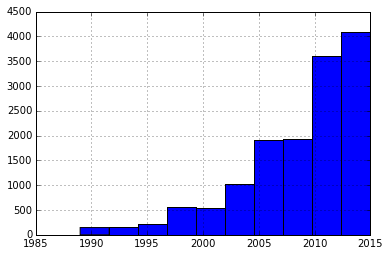

In [467]:
print pd.to_datetime(I_NV.date).min()
print pd.to_datetime(I_NV.date).max()
pd.to_datetime(I_NV.date).apply(lambda x: x.year).hist()

In [470]:
I_NV.pivot_table(values='serial_number',index='result',columns='grade',aggfunc='count')

grade,,A,B,C,N,O,X
result,,,,,,,
Approved,NaN,NaN,NaN,NaN,NaN,475,NaN
Approved - Follow Up: Operations,325,1,NaN,NaN,NaN,19,NaN
Approved - Follow Up: Plan Review,289,NaN,NaN,NaN,NaN,2,NaN
B Downgrade,NaN,NaN,1343,NaN,NaN,NaN,NaN
C Downgrade,NaN,NaN,NaN,562,NaN,NaN,NaN
Closed with Fees,NaN,NaN,NaN,NaN,NaN,NaN,110
Closed without Fees,NaN,NaN,NaN,NaN,NaN,NaN,6
Complaint Invalid/Unsubstantiated,89,258,5,1,NaN,NaN,NaN
Compliance Schedule,NaN,1,NaN,NaN,NaN,NaN,NaN


In [469]:
I_NV.pivot_table(values='serial_number',index='grade',columns='type_id',aggfunc='count')

type_id,604,661,910,914,916,918,928,929
grade,,,,,,,,
,96,322,432,18,114,43,105,433
A,259,NaN,NaN,906,8879,NaN,NaN,36
B,36,NaN,NaN,NaN,1335,NaN,NaN,NaN
C,18,NaN,NaN,28,529,NaN,NaN,NaN
N,NaN,3,1,NaN,NaN,NaN,NaN,3
O,NaN,9,2,2,10,3,14,456
X,4,1,NaN,13,95,1,NaN,3


In [458]:
I_NV.groupby('grade').describe()[['demerits']].unstack(-1).sort_values(('demerits','mean'))

demerits                                             
         count       mean        std min 25% 50%   75%  max
grade                                                      
O          496   3.485887   5.301401   0   1   3   5.0  100
A        10080   5.382837   3.697292  -1   3   6   8.0  100
          1563  11.098528  30.955886  -1  -1   0   0.0  100
B         1371  16.908096   3.277040   0  15  18  19.0   23
C          575  29.674783   7.442250   0  26  30  35.0   55
N            7  30.428571  42.832453   0   0   0  56.5  100
X          117  35.136752  19.946872   0  19  34  50.0  100

In [457]:
I_NV.groupby('grade').describe()[['n_viol']].unstack(-1).sort_values(('n_viol','mean'))

n_viol                                         
       count       mean       std min 25% 50% 75% max
grade                                                
        1563   0.511836  1.249976   0   0   0   0  10
O        496   2.024194  1.854130   0   0   2   3  10
N          7   2.142857  3.760699   0   0   0   3   9
A      10080   2.671429  1.825065   0   1   3   4  40
B       1371   6.485777  2.451347   0   5   7   8  14
C        575  10.634783  4.079631   0   9  11  13  23
X        117  12.111111  7.115764   0   7  12  18  25

In [433]:
I_NV[I_NV.n_viol==1].groupby('violations').describe()\
    [['demerits']].unstack(-1).sort_values(('demerits','count'), ascending=False)

demerits                                            
              count      mean        std min 25% 50%   75%  max
violations                                                     
14             2477  4.022204   0.307275   1   4   4  4.00   10
2930           2380  1.279832  11.161500  -1   0   0  0.00  100
36             2354  1.400595   1.311176  -1   1   1  1.00   10
37             2118  0.999056   0.173869  -1   1   1  1.00    4
31             1903  1.118760   0.760195  -1   1   1  1.00   12
13             1534  3.017601   0.311264   2   3   3  3.00    9
2955           1445  3.337716   5.532277  -1   3   3  3.00   97
27             1372  1.000000   0.000000   1   1   1  1.00    1
35             1290  1.196124   0.920156  -1   1   1  1.00   10
233            1159  7.417601  24.142136  -1   1   1  1.00   99
2928           1156  0.801903   8.798349  -1   0   0  0.00  100
30             1133  1.462489   1.602685  -1   1   1  1.00   10
215            1113  3.544474   6.896332  -1   3   3  3.00   97
28              842  1.059382   0.719220  -1   1   1  1.00   12
4               792  4.003788   0.957365  -1   4   4  4.00   27
211             737  3.436906   6.079782   3   3   3  3.00   97
114             733  3.989086   0.208798   0   4   4  4.00    4
40              676  3.933432   2.157504   1   2   4  6.00   10
230             550  4.052727  16.566446  -1   1   1  1.00   99
212             543  3.882136  10.942188   3   3   3  3.00  200
64              540  5.633333   1.280219   0   6   6  6.00   13
38              518  4.413127   2.636447  -1   1   4  6.00   12
10              516  5.180233   3.467530   2   3   3  7.00   40
214             507  5.783037  15.943709   1   3   3  3.00   97
112             502  4.000000   0.000000   4   4   4  4.00    4
25              488  1.204918   1.077594   1   1   1  1.00   10
8               455  5.712088   2.147267   3   4   6  6.00   20
2909            450  3.011111   0.235702   3   3   3  3.00    8
19              447  1.049217   0.431176   1   1   1  1.00    6
218             374  3.350267   5.073485   3   3   3  3.00   97
...             ...       ...        ...  ..  ..  ..   ...  ...
9                88  2.977273   2.228227   2   2   2  3.25   16
231              88  1.022727   0.149887   1   1   1  1.00    2
21               83  1.096386   0.484251   1   1   1  1.00    4
15               79  6.000000   0.000000   6   6   6  6.00    6
2908             69  3.000000   0.000000   3   3   3  3.00    3
223              67  8.611940  22.439788   3   3   3  3.00   97
226              62  8.903226  26.902197   1   1   1  1.00   99
29               45  2.000000   1.552125   1   1   2  2.00    8
1                35  6.000000   0.000000   6   6   6  6.00    6
7                26  2.000000   0.000000   2   2   2  2.00    2
210              26  5.000000   0.000000   5   5   5  5.00    5
220              24  6.916667  19.187670   3   3   3  3.00   97
205              22  9.090909  19.188064   5   5   5  5.00   95
39               21  5.619048   2.355338   1   4   6  6.00   10
17               21  2.142857   0.478091   2   2   2  2.00    4
201              21  9.333333  19.629909   5   5   5  5.00   95
203              20  5.150000   0.670820   5   5   5  5.00    8
2907             18  8.222222  22.156012   3   3   3  3.00   97
61               18  6.000000   0.000000   6   6   6  6.00    6
2925             17  0.000000   0.000000   0   0   0  0.00    0
207              14  5.000000   0.000000   5   5   5  5.00    5
26               14  3.000000   0.000000   3   3   3  3.00    3
234              12  1.000000   0.000000   1   1   1  1.00    1
224               9  1.333333   1.000000   1   1   1  1.00    4
221               8  3.000000   0.000000   3   3   3  3.00    3
3                 5  2.800000   1.303840   2   2   2  3.00    5
302               4  0.000000   0.000000   0   0   0  0.00    0
62                2  6.000000   0.000000   6   6   6  6.00    6
219               2  3.000000   0.000000   

# Model, Create X, y:

In [285]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [278]:
df_train, df_test = train_test_split(df_WI)

X_train = df_train[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_train = df_train[['n_violations','n_critical']].values
X_test = df_test[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_test = df_test[['n_violations','n_critical']].values

In [276]:
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
model_ols_sm = sm.OLS(y_train[:,1], sm.add_constant(X_train[:,[2,3,4]]) )
res = model_ols_sm.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.739
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           0.000667
Time:                        13:10:02   Log-Likelihood:                -3164.3
No. Observations:                1485   AIC:                             6337.
Df Residuals:                    1481   BIC:                             6358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8800      0.248      7.585      0.0

In [283]:
df_train.describe()

,n_violations,n_critical,rev_ct,neg_ct,stars_avg,rev_len_avg,stars_var
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,4.282155,2.220202,8.716498,8.716498,3.502187,597.791884,1.111015
std,3.546835,2.050408,12.690321,12.690321,0.939607,328.411301,1.203548
min,0.000000,0.000000,1.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,391.000000,0.000000
50%,4.000000,2.000000,4.000000,4.000000,3.666667,564.750000,0.894737
75%,6.000000,3.000000,10.000000,10.000000,4.100000,740.812500,1.655556
max,22.000000,13.000000,134.000000,134.000000,5.000000,4236.000000,8.000000


In [284]:
df_test.describe()

,n_violations,n_critical,rev_ct,neg_ct,stars_avg,rev_len_avg,stars_var
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,4.454545,2.430303,7.739394,7.739394,3.491642,631.490225,1.044846
std,4.076378,2.432633,9.661412,9.661412,0.949514,384.902831,1.123696
min,0.000000,0.000000,1.000000,1.000000,1.000000,38.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,390.250000,0.000000
50%,3.000000,2.000000,4.000000,4.000000,3.666667,575.250000,0.787879
75%,6.000000,4.000000,10.000000,10.000000,4.088008,784.083333,1.600000
max,37.000000,17.000000,65.000000,65.000000,5.000000,4242.000000,8.000000


In [344]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train[:,1])
y_pred = model_rf.predict(X_test)
#f1_score(y_test[:,1]+0.001, y_pred+0.001)

In [298]:
I_WI.describe()

,n_violations,n_critical
count,2831.000000,2831.000000
mean,4.467326,2.374779
std,3.862419,2.280301
min,0.000000,0.000000
25%,1.000000,1.000000
50%,4.000000,2.000000
75%,6.000000,4.000000
max,37.000000,17.000000


In [313]:
temp = I_WI.copy()
temp['n_core'] = - temp.n_critical + temp.n_violations
temp['grade'] = 0
temp.loc[temp.n_critical>= 1,'grade'] +=1
temp.loc[temp.n_critical>= 2,'grade'] +=1
temp.loc[temp.n_critical>= 3,'grade'] +=1
temp.loc[temp.n_core>=4,'grade'] +=1
temp['target'] = temp.grade >= 3

In [322]:
temp.groupby('id_').max().describe()

,n_violations,n_critical,n_core,grade,target
count,636.000000,636.000000,636.000000,636.000000,636
mean,7.127358,3.753145,4.061321,2.886792,0.718553
std,4.149696,2.361850,2.710902,1.064716,0.450059
min,0.000000,0.000000,0.000000,0.000000,False
25%,4.000000,2.000000,2.000000,2.000000,0
50%,6.000000,3.000000,4.000000,3.000000,1
75%,9.000000,5.000000,6.000000,4.000000,1
max,37.000000,17.000000,20.000000,4.000000,True
